<a href="https://colab.research.google.com/github/Rashijain07/rashi_jain/blob/main/BreastCancerDetection_VariousMLAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

Choose Dataset from Local Directory

In [1]:
from google.colab import files
uploaded= files.upload()

Saving breast-cancer.csv to breast-cancer.csv


Load Dataset

In [3]:
dataset=pd.read_csv("breast-cancer.csv")
print(dataset)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

Summarize dataset

In [5]:
print(dataset.shape)
print(dataset.head(5))

(569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst

Mapping Class String Values to Numbers

In [6]:
dataset['diagnosis']=dataset['diagnosis'].map({'M':1,'B':0}).astype(int)
print(dataset.head)

<bound method NDFrame.head of            id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.2776

Segregate dataset into X & Y

In [8]:
X= dataset.iloc[:,2:32].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
Y=dataset.iloc[:,1].values
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

Splitting dataset into Train & Test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.25, random_state=0)
X_train
X_test

array([[1.340e+01, 2.052e+01, 8.864e+01, ..., 2.051e-01, 3.585e-01,
        1.109e-01],
       [1.321e+01, 2.525e+01, 8.410e+01, ..., 6.005e-02, 2.444e-01,
        6.788e-02],
       [1.402e+01, 1.566e+01, 8.959e+01, ..., 8.216e-02, 2.136e-01,
        6.710e-02],
       ...,
       [1.234e+01, 1.227e+01, 7.894e+01, ..., 1.070e-01, 3.110e-01,
        7.592e-02],
       [1.353e+01, 1.094e+01, 8.791e+01, ..., 7.407e-02, 2.710e-01,
        7.191e-02],
       [1.959e+01, 1.815e+01, 1.307e+02, ..., 2.247e-01, 3.643e-01,
        9.223e-02]])

Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train
X_test

array([[-0.21395901,  0.3125461 , -0.14355187, ...,  1.37043754,
         1.08911166,  1.53928319],
       [-0.26750714,  1.461224  , -0.32955207, ..., -0.84266106,
        -0.71577388, -0.88105993],
       [-0.03922298, -0.86770223, -0.10463112, ..., -0.505318  ,
        -1.20298225, -0.92494342],
       ...,
       [-0.51270124, -1.69096186, -0.54095317, ..., -0.12632201,
         0.33773512, -0.42872244],
       [-0.17732081, -2.01395163, -0.17345939, ..., -0.62875108,
        -0.29500302, -0.65432858],
       [ 1.5305829 , -0.26300709,  1.57961296, ...,  1.6694843 ,
         1.18085869,  0.48889253]])

Validating some ML algorithm by its accuracy-Model Score

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


In [14]:
models=[]
models.append(('LR', LogisticRegression(solver="liblinear", multi_class="ovr")))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma="auto")))

LR : 0.981285
LDA : 0.957863
KNN : 0.964839
CART : 0.927243
NB : 0.941417
SVM : 0.979014


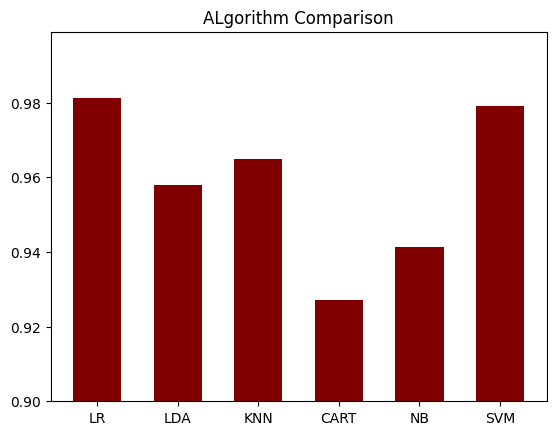

In [18]:
results=[]
names=[]
res=[]
for name,model in models:
  kfold=StratifiedKFold(n_splits=10, random_state=None)
  cv_results= cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
  results.append(cv_results)
  names.append(name)
  res.append(cv_results.mean())
  print('%s : %f' %(name, cv_results.mean()))

pyplot.ylim(.900, .999)
pyplot.bar(names, res, color='maroon', width=0.6)

pyplot.title('ALgorithm Comparison')
pyplot.show()

Training & Prediction using the algorithm with high accuracy

In [20]:
model= LogisticRegression(solver="liblinear", multi_class="ovr")
model.fit(X_train, y_train)
value=[[17.99,10.38,122.8,1001,0.1184,0.2776, 0.3001,0.1471, 0.2419, 0.07871,1.095,0.9053,23,278, 0.3426, 97, 2628.0, 0.7,0.12,1.23,2.23,3.45,5.78,9,1,2,3,34,5,6]]
y_pred=model.predict(value)
print(y_pred)

[1]
